# Visualization with the correct SPL-Calc

In [13]:
import pandas as pd

# Load the feature set data
df = pd.read_csv('df_total_cat.csv')

# Remove rows where 'vehicle' or 'speed_kmh' is NaN
df = df.dropna(subset=['vehicle', 'speed_kmh'])

# Filter the dataframe to include only rows where the microphone is 'SE'
df_SE = df[df['microphone'] == 'SE']

We have in total only 5 files for Motorcylce that have a speed reading (30kmh). That's why we don't include M going further.

In [14]:
# Filter the dataframe for Motorcycle
df_motorcycle = df_SE[df_SE['vehicle'] == "M"]

# Group by speed category and count the number of files
motorcycle_counts = df_motorcycle["speed_kmh"].value_counts().sort_index()

# Convert to a list of tuples (speed, count)
motorcycle_counts_list = list(motorcycle_counts.items())

print(motorcycle_counts_list)

[(30.0, 5)]


In [15]:
# Drop rows where the vehicle type is 'M'
df_SE = df_SE[df_SE['vehicle'] != 'M']

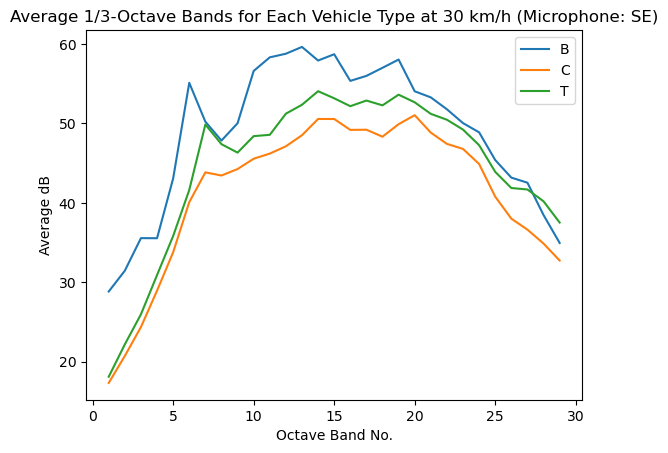

In [16]:
import matplotlib.pyplot as plt

# Calculate the average SPL bands for each vehicle type and speed pair
df_avg_spl = df_SE.groupby(['vehicle', 'speed_kmh'])[
    ['band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB', 
     'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB', 'band_15_dB', 'band_16_dB', 
     'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB', 'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 
     'band_25_dB', 'band_26_dB', 'band_27_dB', 'band_28_dB', 'band_29_dB']
].mean().reset_index()

# Melt the dataframe to have SPL bands as a single column
df_melted = df_avg_spl.melt(
    id_vars=['vehicle', 'speed_kmh'], 
    value_vars=['band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB', 
                'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB', 'band_15_dB', 'band_16_dB', 
                'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB', 'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 
                'band_25_dB', 'band_26_dB', 'band_27_dB', 'band_28_dB', 'band_29_dB'], 
    var_name='SPL_Band', value_name='SPL'
)

# Replace SPL_Band values with numbers
df_melted['SPL_Band'] = df_melted['SPL_Band'].str.extract('(\d+)').astype(int)

# Filter the data for speed 30 km/h
df_filtered = df_melted[df_melted['speed_kmh'] == 30]

# Create the plot
fig, ax = plt.subplots()
for vehicle, group in df_filtered.groupby('vehicle'):
    group.plot(x='SPL_Band', y='SPL', ax=ax, label=vehicle)

# Set the title and labels
ax.set_title('Average 1/3-Octave Bands for Each Vehicle Type at 30 km/h (Microphone: SE)')
ax.set_xlabel('Octave Band No.')
ax.set_ylabel('Average dB')

# Save the figure with dpi=300
plt.savefig('plots/average_dB_bands_30kmh.png', dpi=400)

# Show the plot
plt.show()

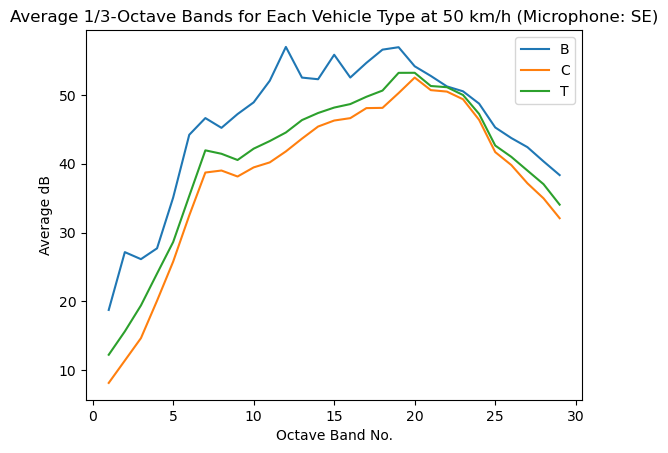

In [17]:
import matplotlib.pyplot as plt

# Calculate the average SPL bands for each vehicle type and speed pair
df_avg_spl = df_SE.groupby(['vehicle', 'speed_kmh'])[
    ['band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB', 
     'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB', 'band_15_dB', 'band_16_dB', 
     'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB', 'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 
     'band_25_dB', 'band_26_dB', 'band_27_dB', 'band_28_dB', 'band_29_dB']
].mean().reset_index()

# Melt the dataframe to have SPL bands as a single column
df_melted = df_avg_spl.melt(
    id_vars=['vehicle', 'speed_kmh'], 
    value_vars=['band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB', 
                'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB', 'band_15_dB', 'band_16_dB', 
                'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB', 'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 
                'band_25_dB', 'band_26_dB', 'band_27_dB', 'band_28_dB', 'band_29_dB'], 
    var_name='SPL_Band', value_name='SPL'
)

# Replace SPL_Band values with numbers
df_melted['SPL_Band'] = df_melted['SPL_Band'].str.extract('(\d+)').astype(int)

# Filter the data for speed 30 km/h
df_filtered = df_melted[df_melted['speed_kmh'] == 50]

# Create the plot
fig, ax = plt.subplots()
for vehicle, group in df_filtered.groupby('vehicle'):
    group.plot(x='SPL_Band', y='SPL', ax=ax, label=vehicle)

# Set the title and labels
ax.set_title('Average 1/3-Octave Bands for Each Vehicle Type at 50 km/h (Microphone: SE)')
ax.set_xlabel('Octave Band No.')
ax.set_ylabel('Average dB')

# Save the figure with dpi=300
plt.savefig('plots/average_dB_bands_50kmh.png', dpi=400)

# Show the plot
plt.show()

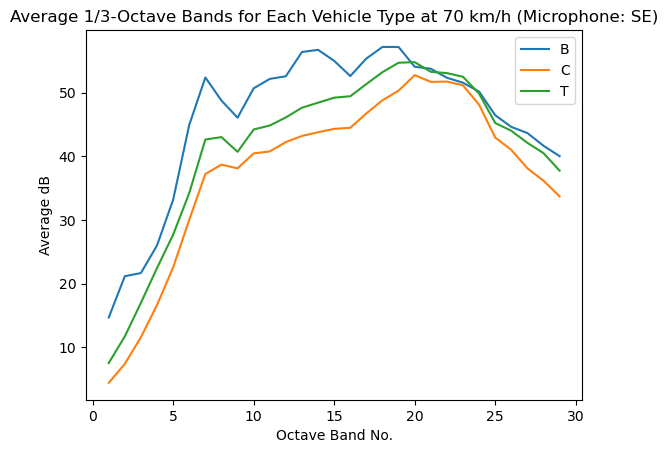

In [44]:
import matplotlib.pyplot as plt

# Calculate the average SPL bands for each vehicle type and speed pair
df_avg_spl = df_SE.groupby(['vehicle', 'speed_kmh'])[
    ['band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB', 
     'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB', 'band_15_dB', 'band_16_dB', 
     'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB', 'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 
     'band_25_dB', 'band_26_dB', 'band_27_dB', 'band_28_dB', 'band_29_dB']
].mean().reset_index()

# Melt the dataframe to have SPL bands as a single column
df_melted = df_avg_spl.melt(
    id_vars=['vehicle', 'speed_kmh'], 
    value_vars=['band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB', 
                'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB', 'band_15_dB', 'band_16_dB', 
                'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB', 'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 
                'band_25_dB', 'band_26_dB', 'band_27_dB', 'band_28_dB', 'band_29_dB'], 
    var_name='SPL_Band', value_name='SPL'
)

# Replace SPL_Band values with numbers
df_melted['SPL_Band'] = df_melted['SPL_Band'].str.extract('(\d+)').astype(int)

# Filter the data for speed 30 km/h
df_filtered = df_melted[df_melted['speed_kmh'] == 70]

# Create the plot
fig, ax = plt.subplots()
for vehicle, group in df_filtered.groupby('vehicle'):
    group.plot(x='SPL_Band', y='SPL', ax=ax, label=vehicle)

# Set the title and labels
ax.set_title('Average 1/3-Octave Bands for Each Vehicle Type at 70 km/h (Microphone: SE)')
ax.set_xlabel('Octave Band No.')
ax.set_ylabel('Average dB')

# Save the figure with dpi=300
plt.savefig('plots/average_dB_bands_70kmh.png', dpi=400)

# Show the plot
plt.show()

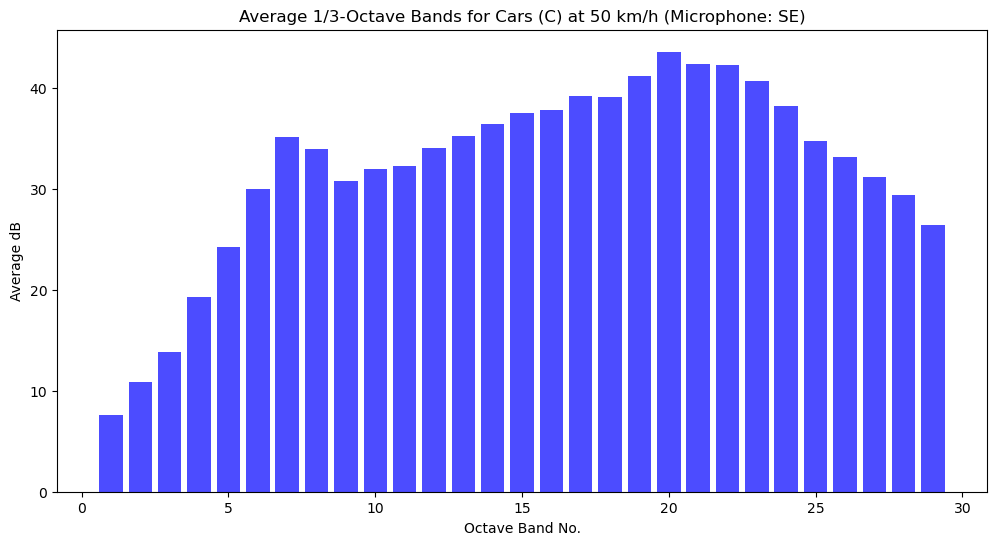

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('df_total_cat.csv')

# Calculate the average SPL bands for each vehicle type and speed pair
df_avg_spl = df.groupby(['vehicle', 'speed_kmh'])[
    ['band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB', 
     'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB', 'band_15_dB', 'band_16_dB', 
     'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB', 'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 
     'band_25_dB', 'band_26_dB', 'band_27_dB', 'band_28_dB', 'band_29_dB']
].mean().reset_index()

# Melt the dataframe to have SPL bands as a single column
df_melted = df_avg_spl.melt(
    id_vars=['vehicle', 'speed_kmh'], 
    value_vars=['band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB', 
                'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB', 'band_15_dB', 'band_16_dB', 
                'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB', 'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 
                'band_25_dB', 'band_26_dB', 'band_27_dB', 'band_28_dB', 'band_29_dB'], 
    var_name='SPL_Band', value_name='SPL'
)

# Replace SPL_Band values with numbers
df_melted['SPL_Band'] = df_melted['SPL_Band'].str.extract('(\d+)').astype(int)

# Filter the melted DataFrame for vehicle type 'C' at speed 30 km/h
df_filtered_C = df_melted[(df_melted['vehicle'] == 'C') & (df_melted['speed_kmh'] == 50)]

# Create a column plot
plt.figure(figsize=(12, 6))
plt.bar(df_filtered_C['SPL_Band'], df_filtered_C['SPL'], color='blue', alpha=0.7)

# Set the title and labels
plt.title('Average 1/3-Octave Bands for Cars (C) at 50 km/h (Microphone: SE)')
plt.xlabel('Octave Band No.')
plt.ylabel('Average dB')

# Save the figure with dpi=300
#plt.savefig('plots/average_dB_bands_50kmh_C_column.png', dpi=400)

# Show the plot
plt.show()

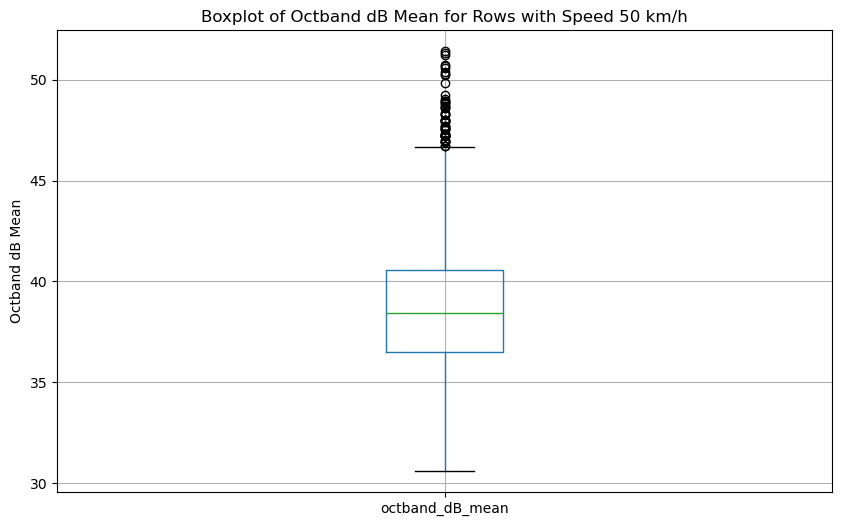

In [32]:
# Filter the dataframe for rows with speed_kmh=50
df_speed_50 = df_SE[df_SE['speed_kmh'] == 50]

# Create a boxplot for octband_dB_mean
plt.figure(figsize=(10, 6))
df_speed_50.boxplot(column='octband_dB_mean')
plt.title('Boxplot of Octband dB Mean for Rows with Speed 50 km/h')
plt.ylabel('Octband dB Mean')
plt.grid(True)

# Save the figure with dpi=400
plt.savefig('plots/octband_dB_mean_50kmh.png', dpi=400)

# Show the plot
plt.show()


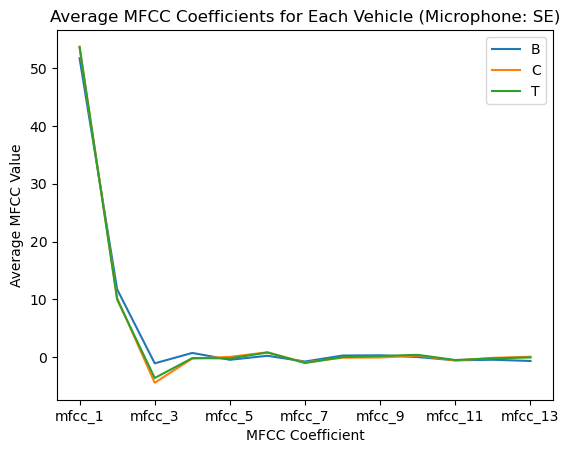

In [19]:
import matplotlib.pyplot as plt

# Calculate the average MFCC coefficients for each vehicle
df_avg_mfcc = df_SE.groupby('vehicle')[['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13']].mean().reset_index()

# Melt the dataframe to have MFCC coefficients as a single column
df_melted_mfcc = df_avg_mfcc.melt(id_vars=['vehicle'], value_vars=['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13'], var_name='MFCC', value_name='Value')

# Create the plot
fig, ax = plt.subplots()
for vehicle, group in df_melted_mfcc.groupby('vehicle'):
    group.plot(x='MFCC', y='Value', ax=ax, label=vehicle)

# Set the title and labels
ax.set_title('Average MFCC Coefficients for Each Vehicle (Microphone: SE)')
ax.set_xlabel('MFCC Coefficient')
ax.set_ylabel('Average MFCC Value')

# Save the figure with dpi=300
plt.savefig('plots/average_mfcc_coef.png', dpi=400)

# Show the plot
plt.show()

In [20]:
num_files_vehicle_M = df_SE[df_SE['vehicle'] == 'C'].shape[0]
print(num_files_vehicle_M)
vehicle_counts = df_SE['vehicle'].value_counts()
print(vehicle_counts)

print(df_SE.head)

3902
vehicle
C    3902
T     511
B      53
Name: count, dtype: int64
<bound method NDFrame.head of        Unnamed: 0                                               file  \
19             19  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1116695...   
21             21  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1137602...   
25             25  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1141442...   
31             31  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1172589...   
39             39  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1238893...   
...           ...                                                ...   
17077       17077  2019-11-19-16-30_Langewiesener-Strasse_50Kmh_9...   
17079       17079  2019-11-19-16-30_Langewiesener-Strasse_50Kmh_9...   
17081       17081  2019-11-19-16-30_Langewiesener-Strasse_50Kmh_9...   
17083       17083  2019-11-19-16-30_Langewiesener-Strasse_50Kmh_9...   
17085       17085  2019-11-19-16-30_Langewiesener-Strasse_50Kmh_9...   

       is_background date_time      

# To Do: Visualization of Waveform + Envelope

### Single file W+E

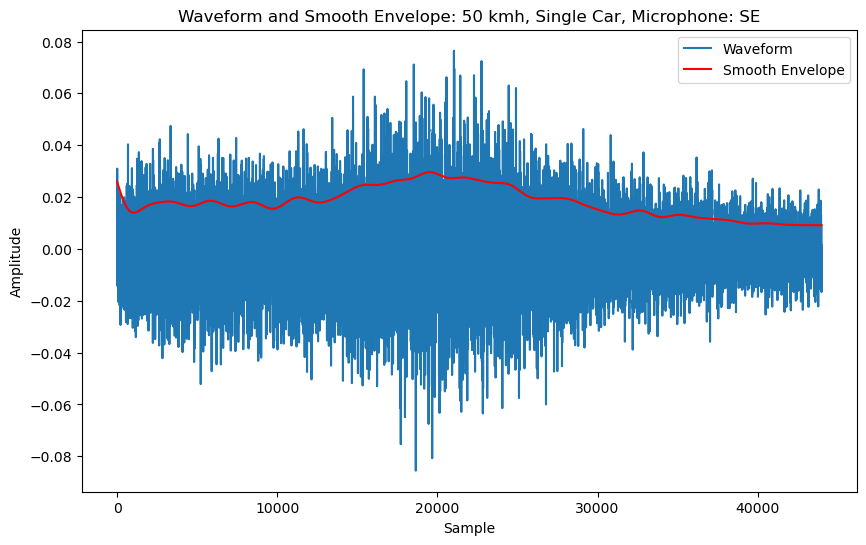

In [37]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import hilbert, butter, filtfilt
import numpy as np

# Beispiel für ein File
file_path = "/Users/jakob/Downloads/IDMT_Traffic/preprocessed_audio_not_normalized/2019-11-18-15-45_Langewiesener-Strasse_50Kmh_2702192_A_D_CR_SE_CH34.wav"
sample_rate, data = wavfile.read(file_path)

# Mono konvertieren, falls Stereo
if data.ndim == 2:
    data = data.mean(axis=1)

# Envelope berechnen
envelope = np.abs(hilbert(data))

# Low-pass filter to smooth the envelope
def lowpass_filter(data, cutoff_freq, sample_rate, order=5):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Apply low-pass filter to the envelope
cutoff_frequency = 10  # Adjust the cutoff frequency as needed
smooth_envelope = lowpass_filter(envelope, cutoff_frequency, sample_rate)

# Plot the waveform and its smooth envelope
plt.figure(figsize=(10, 6))
plt.plot(data, label='Waveform')
plt.plot(smooth_envelope, label='Smooth Envelope', color='red')
plt.title('Waveform and Smooth Envelope: 50 kmh, Single Car, Microphone: SE')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

# Save the figure with dpi=300
plt.savefig('plots/wave_env_50_single_C_SE.png', dpi=400)

plt.show()

### Average W+E for Cars 50kmh

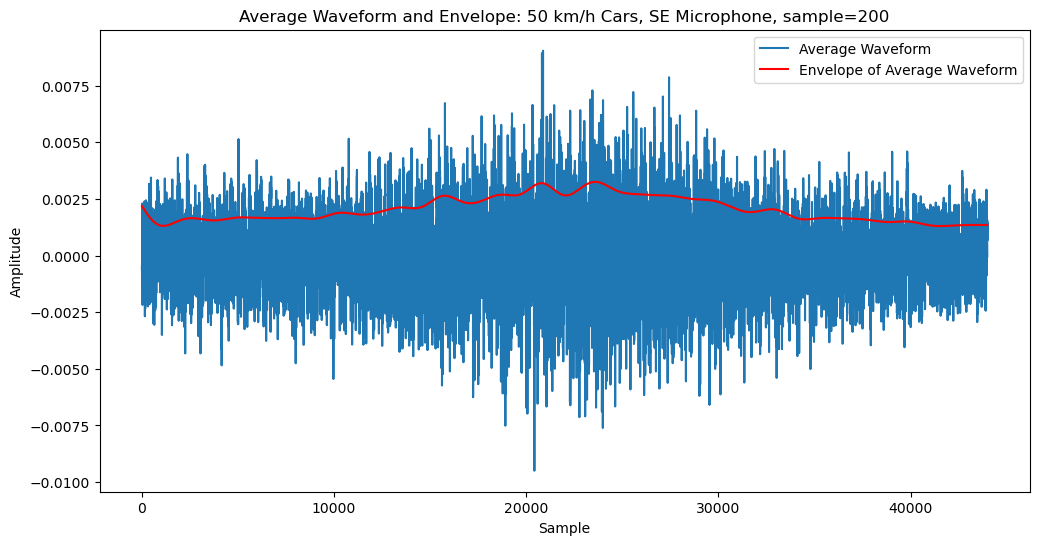

In [40]:
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import hilbert, butter, filtfilt
import pandas as pd
import numpy as np

# Specify the directory containing the .wav files
input_directory = "/Users/jakob/Downloads/IDMT_Traffic/preprocessed_audio_not_normalized"

# Load the DataFrame
df = pd.read_csv('df_total_cat.csv')

# Filter rows for specific conditions
filtered_df = df[
    (df['speed_kmh'] == 50) & 
    (df['microphone'] == 'SE') & 
    (df['vehicle'] == 'C')
]

# Select a random sample of 200 files
filtered_df_sample = filtered_df.sample(n=200, random_state=42)

# Function to process and return waveform
def process_audio(file_path):
    sample_rate, data = wavfile.read(file_path)
    if data.ndim == 2:  # Convert to mono if stereo
        data = data.mean(axis=1)
    return sample_rate, data

# Function to compute envelope
def compute_envelope(data, sample_rate, cutoff_freq=10, order=5):
    # Hilbert transform for analytic signal
    envelope = np.abs(hilbert(data))
    # Low-pass filter for smoothing
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    smooth_envelope = filtfilt(b, a, envelope)
    return smooth_envelope

# Function to normalize waveforms to the same length
def normalize_waveform_length(waveforms, target_length):
    normalized_waveforms = []
    for waveform in waveforms:
        if len(waveform) > target_length:
            normalized_waveforms.append(waveform[:target_length])  # Truncate
        else:
            padding = target_length - len(waveform)
            normalized_waveforms.append(np.pad(waveform, (0, padding), 'constant'))  # Pad with zeros
    return np.array(normalized_waveforms)

# Aggregate and normalize waveforms
all_waveforms = []
target_length = 0
for idx, row in filtered_df_sample.iterrows():
    file_name = row['file'] + '.wav'  # Add .wav extension
    file_path = os.path.join(input_directory, file_name)  # Construct full path
    try:
        sample_rate, data = process_audio(file_path)
        all_waveforms.append(data)
        target_length = max(target_length, len(data))  # Update target length to longest waveform
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

# Compute average waveform
if all_waveforms:
    normalized_waveforms = normalize_waveform_length(all_waveforms, target_length)
    average_waveform = normalized_waveforms.mean(axis=0)

    # Compute envelope of the average waveform
    average_envelope = compute_envelope(average_waveform, sample_rate)

    # Plot average waveform and envelope
    plt.figure(figsize=(12, 6))
    plt.plot(average_waveform, label='Average Waveform')
    plt.plot(average_envelope, label='Envelope of Average Waveform', color='red')
    plt.title('Average Waveform and Envelope: 50 km/h Cars, SE Microphone, sample=200')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()

    # Save the figure with dpi=300
    plt.savefig('plots/avg_wave_env_50_C_SE_rndm200.png', dpi=400)

    plt.show()
else:
    print("No valid waveforms processed.")


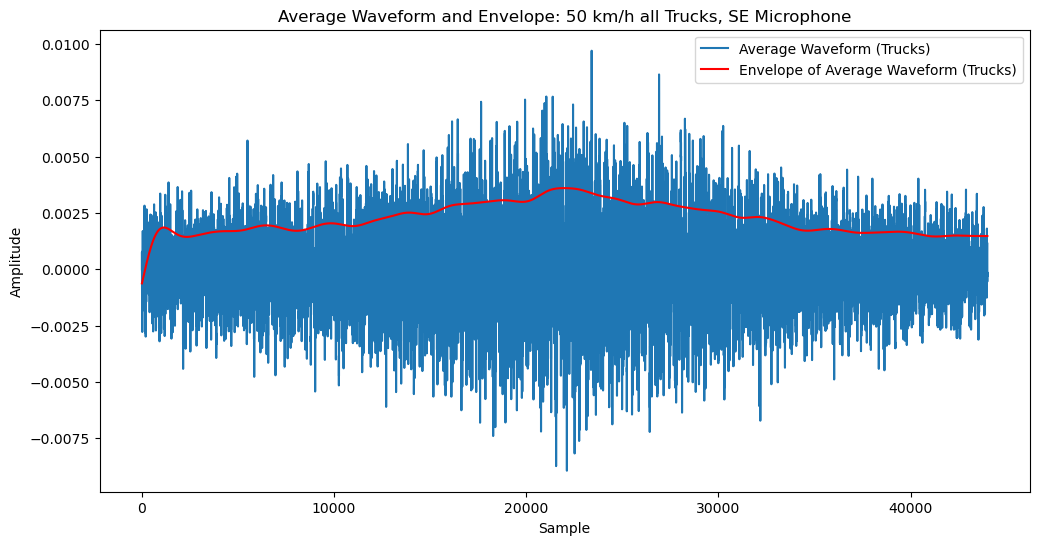

In [42]:
# Filter rows for trucks at 50 km/h
filtered_df_trucks = df[
    (df['speed_kmh'] == 50) & 
    (df['microphone'] == 'SE') & 
    (df['vehicle'] == 'T')
]

# Aggregate and normalize waveforms for all trucks
all_waveforms_trucks = []
target_length_trucks = 0
for idx, row in filtered_df_trucks.iterrows():
    file_name = row['file'] + '.wav'  # Add .wav extension
    file_path = os.path.join(input_directory, file_name)  # Construct full path
    try:
        sample_rate, data = process_audio(file_path)
        all_waveforms_trucks.append(data)
        target_length_trucks = max(target_length_trucks, len(data))  # Update target length to longest waveform
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

# Compute average waveform for trucks
if all_waveforms_trucks:
    normalized_waveforms_trucks = normalize_waveform_length(all_waveforms_trucks, target_length_trucks)
    average_waveform_trucks = normalized_waveforms_trucks.mean(axis=0)

    # Compute envelope of the average waveform for trucks
    average_envelope_trucks = compute_envelope(average_waveform_trucks, sample_rate)

    # Plot average waveform and envelope for trucks
    plt.figure(figsize=(12, 6))
    plt.plot(average_waveform_trucks, label='Average Waveform (Trucks)')
    plt.plot(average_envelope_trucks, label='Envelope of Average Waveform (Trucks)', color='red')
    plt.title('Average Waveform and Envelope: 50 km/h all Trucks, SE Microphone')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()

    # Save the figure with dpi=300
    plt.savefig('plots/avg_wave_env_50_T_SE.png', dpi=400)

    plt.show()
else:
    print("No valid waveforms processed.")

# To Do: Feature Scatterplots & Boxplots

In [24]:
import pandas as pd
import plotly.express as px

# Filter the dataframe for vehicles 'C', 'T', 'B' and speed 30 km/h
df_filtered = df_SE[(df_SE['vehicle'].isin(['C', 'T', 'B'])) & (df_SE['speed_kmh'].astype(int) == 30)]

# Melt the dataframe to have MFCC coefficients as a single column
df_melted_mfcc = df_filtered.melt(id_vars=['vehicle'], value_vars=['mfcc_1'], var_name='MFCC', value_name='Value')

# Create the box plot
fig = px.box(df_melted_mfcc, x='vehicle', y='Value', title='Boxplots of MFCC_1 for Vehicles C, T, B at 30 km/h', labels={'Value': 'MFCC_1 Value', 'vehicle': 'Vehicle'})

# Show the plot
fig.show()

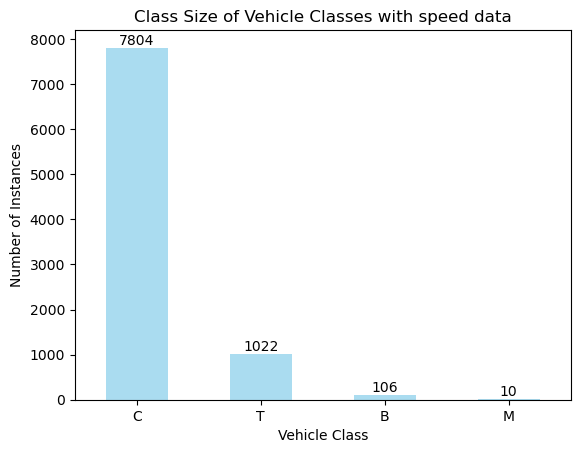

In [62]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('df_total_cat.csv')

# Remove rows where 'vehicle' or 'speed_kmh' is NaN
df = df.dropna(subset=['vehicle', 'speed_kmh'])

# Count the number of instances for each vehicle class
vehicle_counts = df['vehicle'].value_counts()

# Create a column plot
ax = vehicle_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Add the number for each column on top
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the title and labels
plt.title('Class Size of Vehicle Classes with speed data')
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Instances')

# Ensure x-axis labels are horizontal
plt.xticks(rotation=0)

# Save the figure with dpi=300
#plt.savefig('plots/class_sizes.png', dpi=400)

# Show the plot
plt.show()

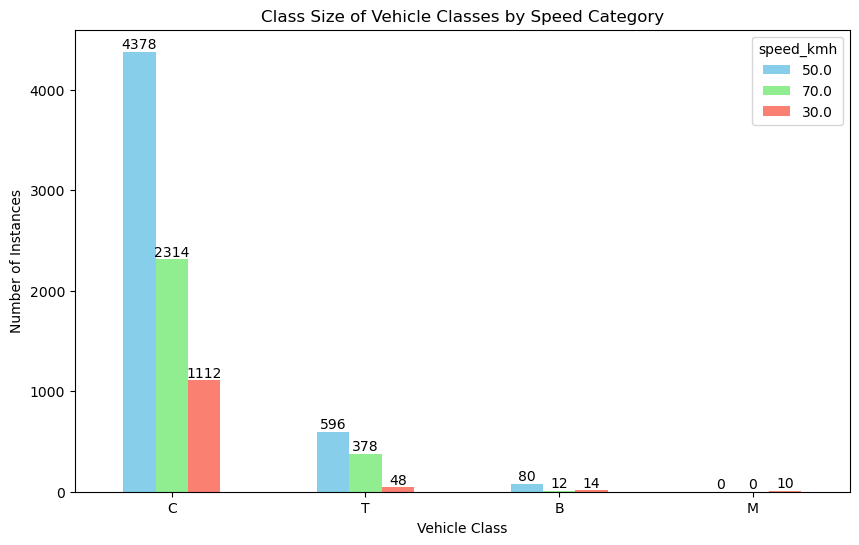

In [66]:
# Reorder the columns to be in the order: 50, 70, 30
vehicle_speed_counts = vehicle_speed_counts[[50.0, 70.0, 30.0]]

# Sort the rows by vehicle type: C, T, B, M
vehicle_speed_counts = vehicle_speed_counts.loc[['C', 'T', 'B', 'M']]

# Plot the data
ax = vehicle_speed_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])

# Add the number for each column on top
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Set the title and labels
plt.title('Class Size of Vehicle Classes by Speed Category')
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Instances')

# Ensure x-axis labels are horizontal
plt.xticks(rotation=0)

# Save the figure with dpi=300
plt.savefig('plots/class_sizes_by_speed.png', dpi=400)

# Show the plot
plt.show()